In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
airline = pd.read_csv('airline_passengers2.csv', index_col='Month')
airline.index = pd.to_datetime(airline.index)
airline.head()

C:\Users\admin\AppData\Local\Temp\ipykernel_14220\4105168967.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  airline.index = pd.to_datetime(airline.index)


,Thousands of Passengers,after_normalization
Month,,
2049-01-01,112,0.184818
2049-02-01,118,0.194719
2049-03-01,132,0.217822
2049-04-01,129,0.212871
2049-05-01,121,0.199670


In [13]:
a = np.array( airline["after_normalization"] )  #after_normalization
a = a.reshape(-1, 6, 1)
print(a.shape) 

144
(24, 6, 1)


In [4]:
X_train = a[0:24, 0:5 ,0]  
X_train = X_train.reshape(-1,5,1)
Y_train = a[0:24, 5, 0]
Y_train = Y_train.reshape(-1,1)
print(X_train[0,0:5,0])
print(Y_train[0,0])

print(X_train.shape)  
print(Y_train.shape) 

[0.18481848 0.19471947 0.21782178 0.21287129 0.19966997]
0.222772277
(24, 5, 1)
(24, 1)


In [5]:
from keras.models import Sequential
from keras.layers import SimpleRNN, Dense

def make_model() :
    model = Sequential()
    model.add(SimpleRNN(2, activation='tanh', input_shape=(5,1))) #relu써도 됨 
    model.add(Dense(1))       
    model.compile(loss='mse', optimizer='sgd')
    model.summary()
    return model



Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn (SimpleRNN)      (None, 2)                 8         
                                                                 
 dense (Dense)               (None, 1)                 3         
                                                                 
Total params: 11 (44.00 Byte)
Trainable params: 11 (44.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________



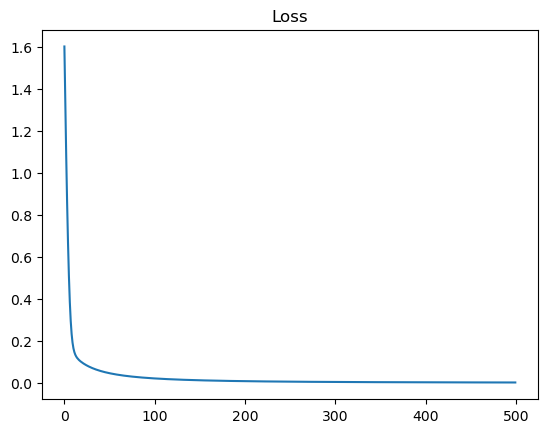

In [6]:
model = make_model()
history = model.fit(X_train, Y_train, epochs= 500, validation_split = 0.2, verbose=0)
plt.plot(history.history["loss"])
plt.title("Loss")
plt.show()

In [7]:
y_predict = model.predict(a[4, 0:5, 0].reshape(-1,5,1))
print(y_predict,a[4 , 5, 0 ])

1/1 [==============================] - 0s 181ms/step
[[0.2953067]] 0.293729373


In [8]:
y_predict = model.predict(a[1, 0:5, 0].reshape(-1,5,1))
print(y_predict,a[1, 5, 0 ])

1/1 [==============================] - 0s 21ms/step
[[0.12072727]] 0.194719472
